In [203]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error

In [205]:
Path = 'train.csv'
df = pd.read_csv(Path)

In [207]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [209]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [211]:
df = df.dropna()

In [213]:
df.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
dtype: int64

In [215]:
df.duplicated().sum()

0

In [217]:
# Drop columns only if they exist in the dataset
unused_cols = ['Row ID', 'Order ID', 'Ship Date', 'Customer Name', 'City', 'Postal Code', 'Ship Mode', 'Segment', 'Country', 'State','Region', 'Category', 'Product Name', 'Sub-Category']
cols_to_drop = [col for col in unused_cols if col in df.columns]

# Now drop the identified columns
df.drop(columns=cols_to_drop, inplace=True)

In [219]:
df.head(10)

,Order Date,Customer ID,Product ID,Sales
0,08/11/2017,CG-12520,FUR-BO-10001798,261.9600
1,08/11/2017,CG-12520,FUR-CH-10000454,731.9400
2,12/06/2017,DV-13045,OFF-LA-10000240,14.6200
3,11/10/2016,SO-20335,FUR-TA-10000577,957.5775
4,11/10/2016,SO-20335,OFF-ST-10000760,22.3680
5,09/06/2015,BH-11710,FUR-FU-10001487,48.8600
6,09/06/2015,BH-11710,OFF-AR-10002833,7.2800
7,09/06/2015,BH-11710,TEC-PH-10002275,907.1520
8,09/06/2015,BH-11710,OFF-BI-10003910,18.5040
9,09/06/2015,BH-11710,OFF-AP-10002892,114.9000


In [221]:
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%d/%m/%Y')
df['Order_day'] = df['Order Date'].dt.day
df['Order_month'] = df['Order Date'].dt.month
df['Order_year'] = df['Order Date'].dt.year
df.drop(columns=['Order Date'],inplace=True)

In [223]:
df.head(10)

,Customer ID,Product ID,Sales,Order_day,Order_month,Order_year
0,CG-12520,FUR-BO-10001798,261.9600,8,11,2017
1,CG-12520,FUR-CH-10000454,731.9400,8,11,2017
2,DV-13045,OFF-LA-10000240,14.6200,12,6,2017
3,SO-20335,FUR-TA-10000577,957.5775,11,10,2016
4,SO-20335,OFF-ST-10000760,22.3680,11,10,2016
5,BH-11710,FUR-FU-10001487,48.8600,9,6,2015
6,BH-11710,OFF-AR-10002833,7.2800,9,6,2015
7,BH-11710,TEC-PH-10002275,907.1520,9,6,2015
8,BH-11710,OFF-BI-10003910,18.5040,9,6,2015
9,BH-11710,OFF-AP-10002892,114.9000,9,6,2015


In [225]:
#import pandas as pd
#import re
# Replace 'Customer ID' with the numerical part using regex
#df['Customer ID'] = df['Customer ID'].apply(lambda x: re.sub(r'\D', '', x))
#df['Product ID'] = df['Product ID'].apply(lambda x: re.sub(r'\D', '', x))
encoder=LabelEncoder()
df['Customer ID']=encoder.fit_transform(df['Customer ID'])
df['Product ID']=encoder.fit_transform(df['Product ID'])



In [227]:
df.head(10)

,Customer ID,Product ID,Sales,Order_day,Order_month,Order_year
0,143,12,261.9600,8,11,2017
1,143,55,731.9400,8,11,2017
2,237,945,14.6200,12,6,2017
3,705,319,957.5775,11,10,2016
4,705,1315,22.3680,11,10,2016
5,88,185,48.8600,9,6,2015
6,88,562,7.2800,9,6,2015
7,88,1759,907.1520,9,6,2015
8,88,793,18.5040,9,6,2015
9,88,437,114.9000,9,6,2015


In [229]:
target = df['Sales']
df = df.drop(columns=['Sales'])
df['Sales'] = target

In [231]:
df.head(10)

,Customer ID,Product ID,Order_day,Order_month,Order_year,Sales
0,143,12,8,11,2017,261.9600
1,143,55,8,11,2017,731.9400
2,237,945,12,6,2017,14.6200
3,705,319,11,10,2016,957.5775
4,705,1315,11,10,2016,22.3680
5,88,185,9,6,2015,48.8600
6,88,562,9,6,2015,7.2800
7,88,1759,9,6,2015,907.1520
8,88,793,9,6,2015,18.5040
9,88,437,9,6,2015,114.9000


In [233]:
corr_matrix = df.corr()
corr_matrix

,Customer ID,Product ID,Order_day,Order_month,Order_year,Sales
Customer ID,1.000000,0.005896,0.012515,0.004871,-0.040539,0.017070
Product ID,0.005896,1.000000,-0.008187,-0.006423,0.003822,0.049541
Order_day,0.012515,-0.008187,1.000000,-0.030586,-0.020000,0.004035
Order_month,0.004871,-0.006423,-0.030586,1.000000,-0.017187,-0.000428
Order_year,-0.040539,0.003822,-0.020000,-0.017187,1.000000,-0.010192
Sales,0.017070,0.049541,0.004035,-0.000428,-0.010192,1.000000


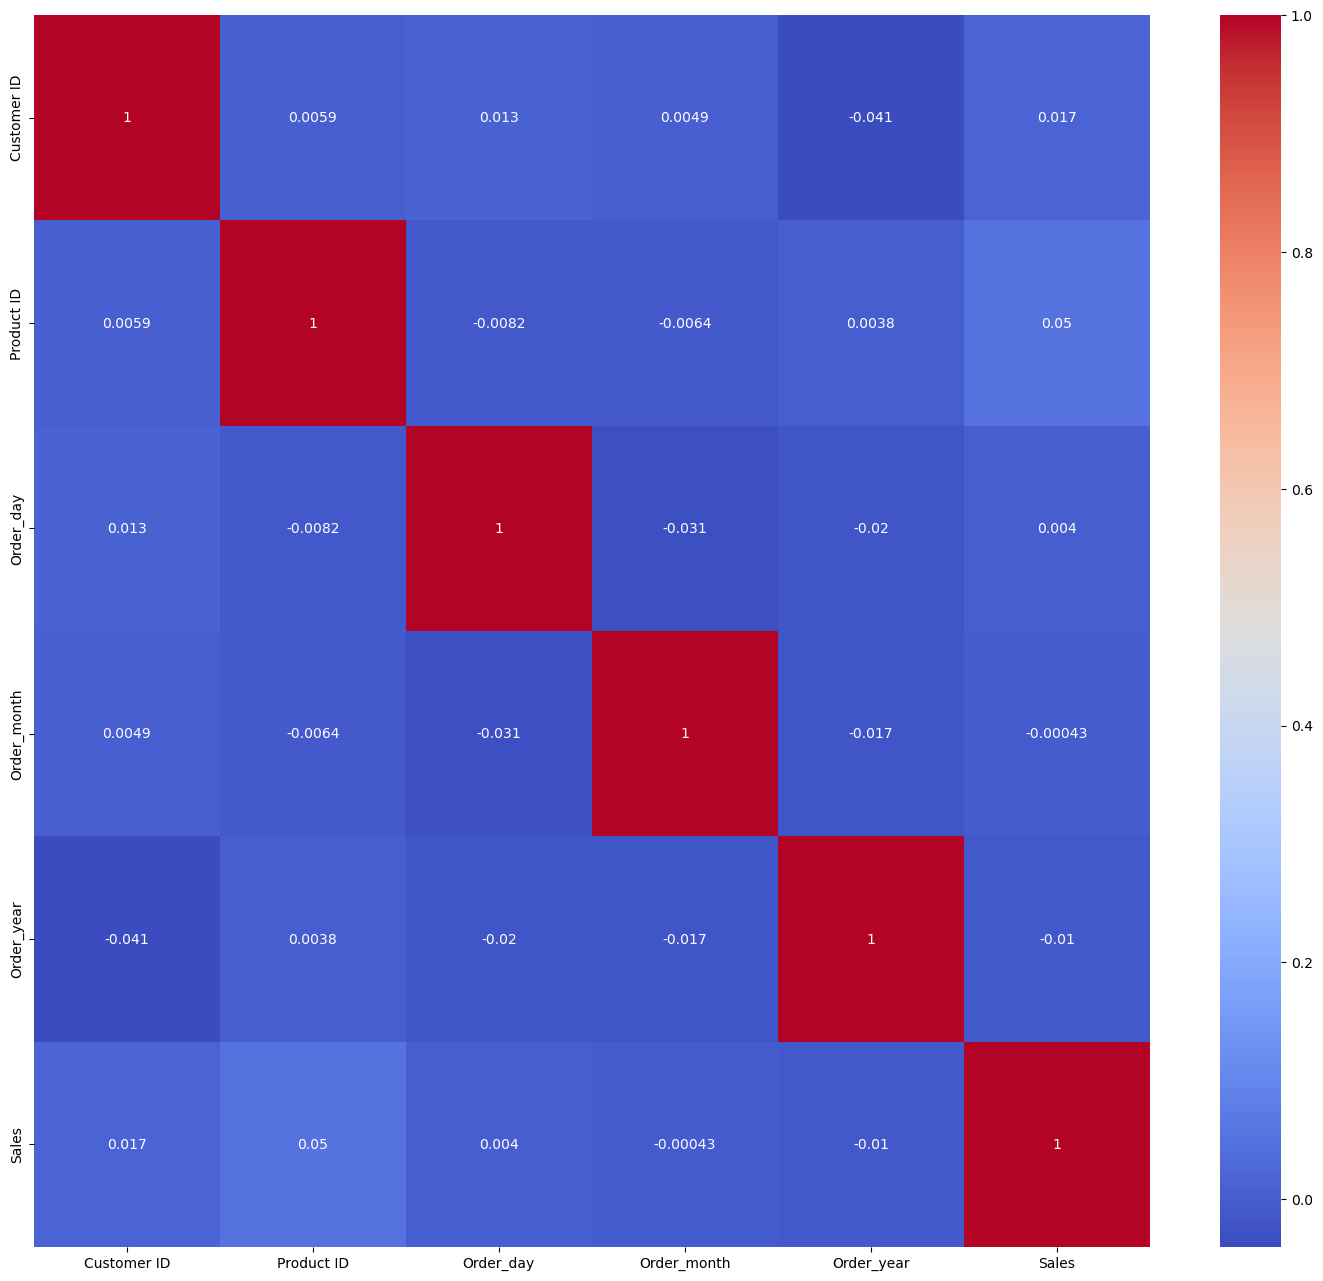

In [235]:
plt.figure(figsize = (18,16))
sns.heatmap(corr_matrix, annot = True, cmap = 'coolwarm')
plt.show()

In [236]:
X = df.drop(columns = ['Sales'])
y = df['Sales']

In [239]:
X.head()

,Customer ID,Product ID,Order_day,Order_month,Order_year
0,143,12,8,11,2017
1,143,55,8,11,2017
2,237,945,12,6,2017
3,705,319,11,10,2016
4,705,1315,11,10,2016


In [256]:
df.head(10)

,Customer ID,Product ID,Order_day,Order_month,Order_year,Sales
0,143,12,8,11,2017,261.9600
1,143,55,8,11,2017,731.9400
2,237,945,12,6,2017,14.6200
3,705,319,11,10,2016,957.5775
4,705,1315,11,10,2016,22.3680
5,88,185,9,6,2015,48.8600
6,88,562,9,6,2015,7.2800
7,88,1759,9,6,2015,907.1520
8,88,793,9,6,2015,18.5040
9,88,437,9,6,2015,114.9000


In [384]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#model = LinearRegression()
#model.fit(X_train, y_train)

In [520]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=62)

In [522]:
#pipeline.fit(X_train, y_train)

In [524]:
# Initialize the Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=200, random_state=72)

# Train the model
rf_regressor.fit(X_train, y_train)


RandomForestRegressor(n_estimators=200, random_state=72)

In [526]:
#y_pred = pipeline.predict(X_test)
#mse = mean_squared_error(y_test, y_pred)
#rmse = mse ** 0.5

In [527]:
# Predict on the test set
# Make predictions
y_pred = rf_regressor.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)  # Mean Squared Error
rmse = np.sqrt(mse)  # Root Mean Squared Error
r2 = r2_score(y_test, y_pred)  # R-squared score

print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R-squared Score: {r2}")


Mean Squared Error: 293437.384006852
Root Mean Squared Error: 541.6986099362375
R-squared Score: 0.4392248457283243


In [531]:
df_frame = pd.DataFrame({'real': y_test, 'prediction': y_pred})
print(df_frame)

         real  prediction
2325   79.872   85.584665
4691  242.352  402.165260
4047   80.880   78.223180
7314  286.400  435.012470
2557    6.992  155.537340
...       ...         ...
9062   36.480   13.068510
9410   87.920  170.257180
1548   27.056  177.935810
6073    5.888   51.381250
4430   20.000   17.199000

[1958 rows x 2 columns]


In [533]:
# Predict on the test set
y_pred = rf_regressor.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)  # Mean Squared Error
rmse = np.sqrt(mse)  # Root Mean Squared Error
r2 = r2_score(y_test, y_pred)  # R-squared score

print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R-squared Score: {r2}")


Mean Squared Error: 293437.384006852
Root Mean Squared Error: 541.6986099362375
R-squared Score: 0.4392248457283243


In [542]:
from joblib import dump
dump(rf_regressor, 'model.pkl')

['model.pkl']